# LAT Data Latency History

#### Including trending of outliers: long-timescales

In [1]:
from astropy.table import Table, Column
import numpy as np
import matplotlib.pyplot as plt
#import pandas as pd
%matplotlib inline
plt.rc('figure', figsize = [12, 10])
plt.rc('font', size = 16)

In [2]:
# read regular ASCII tabular files of data

file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/latency/2017/times.20170309"
f = Table.read(file, format = 'ascii')
y = f['col1'] - 2000
slact = f['col2']
nasat = f['col3']
tott = f['col4']

In [3]:
%%script false
file = "/Users/rac/Documents/GLAST/ISOC/LATmetrics/latency/2016/sm1000.slac.20161026"
f = Table.read(file, format = 'ascii')
ysm = f['col1'] - 2000
p0  = f['col2']
p5  = f['col3']
p50 = f['col4']
p95 = f['col5']
p98 = f['col6']
p99 = f['col7']
p100 = f['col8']

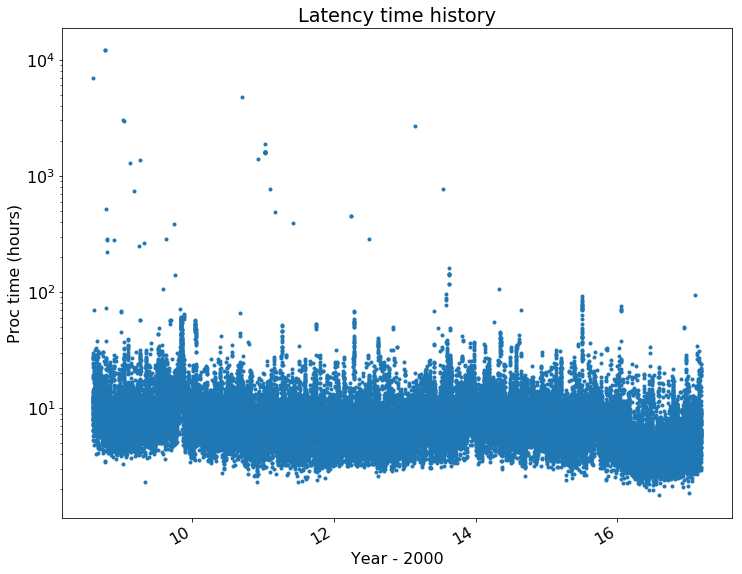

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y, tott, '.')
plt.xlabel("Year - 2000")
plt.ylabel("Proc time (hours)")
plt.title("Latency time history")
plt.yscale('log')
#ax.plot(ysm,p50,'-r')
#ax.plot(ysm,p5,'-r')
#ax.plot(ysm,p95,'-r')
#ax.plot(ysm,p98,'-g')
#ax.plot(ysm,p99,'-v')
plt.gcf().autofmt_xdate()
plt.show()

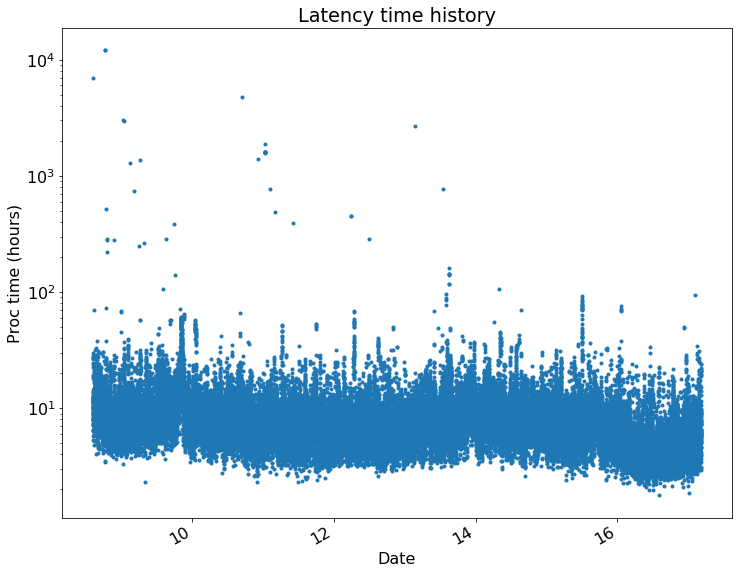

In [8]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(y, tott, '.')
plt.xlabel("Date")
plt.ylabel("Proc time (hours)")
plt.title("Latency time history")
plt.yscale('log')
plt.gcf().autofmt_xdate()
plt.show()